Name: `YOUR NAME`

Student ID: `YOUR STUDENT ID`

# Clustering with EM (GMM) and DBSCAN

In this notebook, you will explore two major unsupervised clustering techniques:

- **Expectation-Maximization (EM) with Gaussian Mixture Models (GMM)**
- **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

You will:
- Implement simplified versions from scratch
- Compare them with `scikit-learn` implementations
- Visualize and interpret the results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN as SK_DBSCAN

## EM Algorithm Intuition

The **Expectation-Maximization (EM)** algorithm is used to estimate the parameters of probabilistic models with latent variables. In the context of GMM, we assume the data is generated from a mixture of Gaussians.

The process iteratively:
1. **E-step**: Estimate the responsibilities (probability of each data point belonging to each component).
2. **M-step**: Update the parameters (means, variances, weights) using those responsibilities.

In this part, you will implement EM from scratch on 1D data.

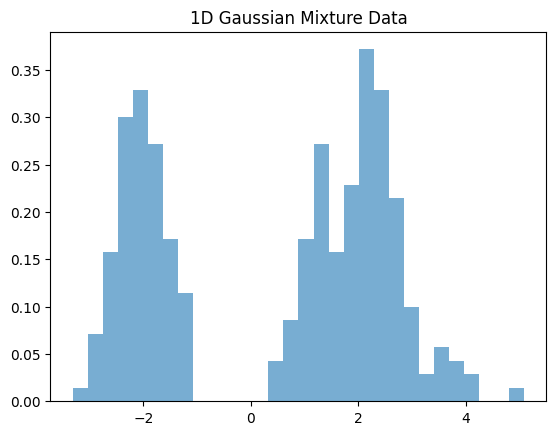

In [ ]:
# Generate synthetic 1D Gaussian mixture data
np.random.seed(42)

# How is data generated? 📣
data = np.hstack([
    np.random.normal(loc=-2, scale=0.5, size=100),
    np.random.normal(loc=2, scale=0.8, size=150)
]).reshape(-1, 1)

# Visualize data
plt.hist(data, bins=30, density=True, alpha=0.6)
plt.title("1D Gaussian Mixture Data")
plt.show()

In [ ]:
# Initialize parameters
k = 2  # number of components
means =  # TODO: Initialize means randomly from data. Mention your choice of range for this 📣
variances =  # TODO: Initialize variances to 1
weights = # TODO: Initialize equal weights

# Define Gaussian PDF
def gaussian(x, mean, var):
    # TODO: Implement Gaussian probability density function
    return None


# EM Algorithm
log_likelihoods = []
for iteration in range(20):
    # E-step: compute responsibilities
    resp = np.zeros((len(data), k))
    for i in range(k):
        resp[:, i] = None  # TODO: Calculate weighted likelihood for component i 📣
    resp = None  # TODO: Normalize responsibilities across components

    # M-step: update parameters
    Nk = resp.sum(axis=0)
    for i in range(k):
        means[i] =  # TODO: Update mean for component i
        variances[i] =  # TODO: Update variance for component i
        weights[i] =  # TODO: Update mixture weight for component i 📣

    # Log-likelihood computation (for convergence monitoring)
    ll = None  # TODO: Calculate log-likelihood of current parameters
    log_likelihoods.append(ll)

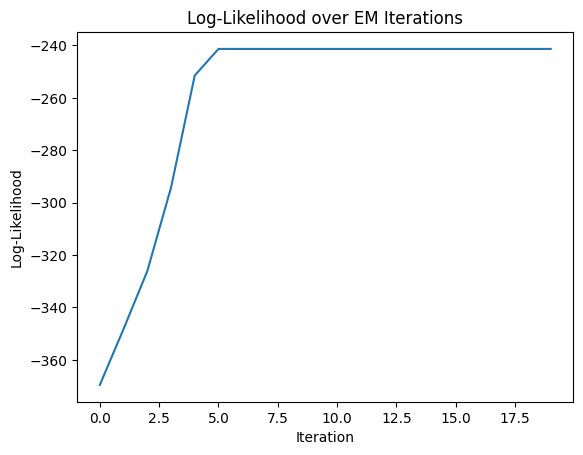

In [ ]:
# Plot log-likelihood
plt.plot(log_likelihoods)
plt.title("Log-Likelihood over EM Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.show()

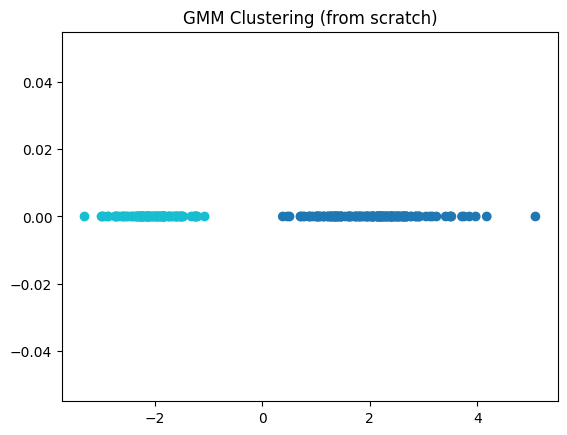

In [ ]:
# Show final cluster assignments
final_resp = np.zeros((len(data), k))
for i in range(k):
    final_resp[:, i] =  # TODO: Calculate final responsibilities
final_labels =  # TODO: Assign each point to the component with highest responsibility

plt.scatter(data, np.zeros_like(data), c=final_labels, cmap='tab10')
plt.title("GMM Clustering (from scratch)")
plt.show()


## Comparison: GMM with scikit-learn

Now, we'll use `sklearn.mixture.GaussianMixture` to model the same data.
This helps validate our implementation and also exposes us to standard tools used in real-world machine learning.

In [ ]:
# Fit GMM using scikit-learn
model = None # TODO: Define the Gaussain Mixture. You can use random_state 42
# TODO: Fit sklearn GMM model to data
labels = None # TODO: Predict cluster labels with sklearn model


# Show model parameters
print("Means:", model.means_.flatten())
print("Weights:", model.weights_)
print("Covariances:", model.covariances_.flatten())

Means: [-2.05201454  2.051918  ]
Weights: [0.39995656 0.60004344]
Covariances: [0.20407461 0.63652495]


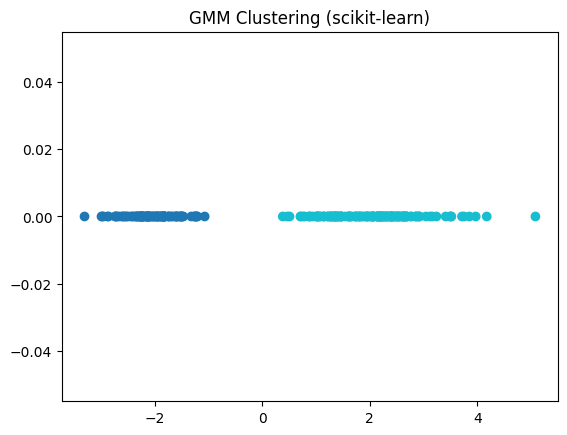

In [ ]:
# Plot GMM Clustering
# What does this plot show? 📣
plt.scatter(data, np.zeros_like(data), c=labels, cmap='tab10')
plt.title("GMM Clustering (scikit-learn)")
plt.show()

## DBSCAN Algorithm Overview

**DBSCAN** is a density-based clustering algorithm that groups together points that are closely packed, and marks points that lie alone in low-density regions as noise.

In this section, you'll implement DBSCAN from scratch.

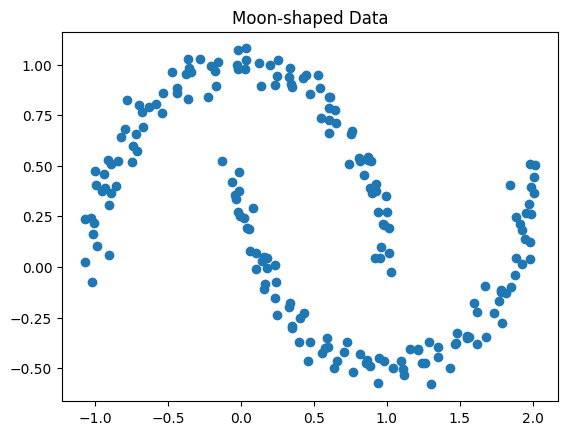

In [ ]:
# Generate 2D moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# Visualize data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Moon-shaped Data")
plt.show()

In [ ]:
# DBSCAN implementation from scratch
def dbscan(X, eps, min_pts):
    labels = None  # TODO: Initialize labels array with -1 for all points
    cluster_id = 0

    def region_query(point_idx):
        # TODO: Return list of indices of points within eps distance of point_idx
        pass

    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id
        # TODO: Assign cluster_id to point_idx
        i = 0
        while i < len(neighbors):
            n_idx = neighbors[i]
            if labels[n_idx] == -1:
                # TODO: Assign cluster_id to neighbor n_idx
                n_neighbors =  # TODO: Find neighbors of n_idx
                if len(n_neighbors) >= min_pts: # 📣
                    # TODO: Add new neighbors to the neighbors list if not already present
                    pass
            i += 1

    for i in range(len(X)):
        if labels[i] != -1:
            continue
        neighbors =  # TODO: Find neighbors of point i
        if len(neighbors) < min_pts: # 📣
            # TODO: Mark point i as noise (-1)
            pass
        else:
            # TODO: Expand cluster from point i
            cluster_id += 1

    return labels  # TODO: Return final cluster labels

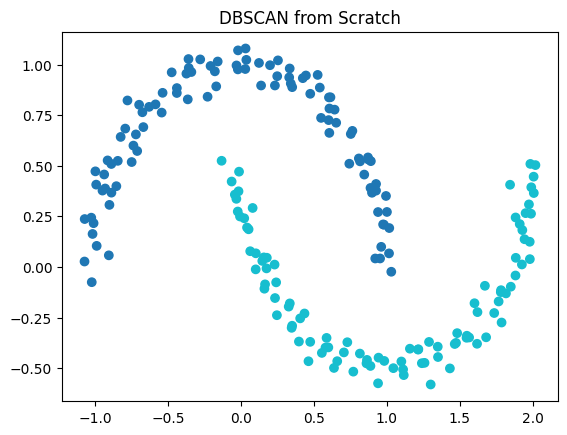

In [ ]:
# Run DBSCAN from scratch
labels_scratch = None  # TODO: Run your dbscan implementation on data X with eps=0.2 and min_pts=5

# Plot DBSCAN from scratch
plt.scatter(X[:, 0], X[:, 1], c=labels_scratch, cmap='tab10')
plt.title("DBSCAN from Scratch")
plt.show()

## Comparison: DBSCAN with scikit-learn

Here, we use `sklearn.cluster.DBSCAN` to cluster the same moon-shaped data. Again, this serves as a benchmark for your scratch version.


In [ ]:
# Run DBSCAN using scikit-learn
db = None  # TODO: Create scikit-learn DBSCAN instance with eps=0.2 and min_samples=5
labels_lib = None  # TODO: Run DBSCAN's fit_predict on data X


In [ ]:
# Show number of clusters and noise
n_clusters = None  # TODO: Compute number of clusters in labels_lib (exclude noise label -1)
n_noise = None  # TODO: Compute number of noise points in labels_lib
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")


Estimated number of clusters: 2
Estimated number of noise points: 0


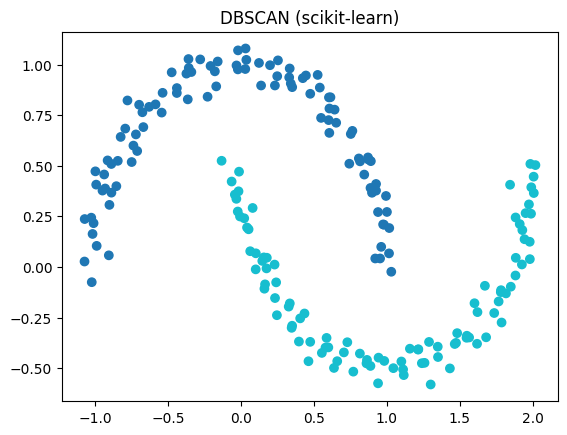

In [ ]:
# Plot DBSCAN result
plt.scatter(X[:, 0], X[:, 1], c=labels_lib, cmap='tab10')
plt.title("DBSCAN (scikit-learn)")
plt.show()
